## DL test
Quick deep learning approach test with fastAI.

In [152]:
from fastai.tabular import * 
from sklearn import preprocessing

In [4]:
df = pd.read_csv('data/train.csv', '|')
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


Subset (as in data overview)

In [16]:
fraudulent = df[df['fraud']==1]
non_fraudulent = df[df['fraud']==0]
n = fraudulent.count()[0]
non_fraudulent_subset = non_fraudulent.sample(n)
fraudulent.reset_index(drop=True, inplace=True)
non_fraudulent_subset.reset_index(drop=True, inplace=True)
dfs = pd.concat([fraudulent, non_fraudulent_subset])
dfs = dfs.sample(208).reset_index(drop=True)

Simple DL model

In [72]:
dep_var = 'fraud'
valid_idx = range(len(dfs)-20, len(dfs))
procs = [Normalize]
data = TabularDataBunch.from_df(path='data', df=dfs, procs=procs, dep_var=dep_var, valid_idx=valid_idx)

In [73]:
data

TabularDataBunch;

Train: LabelList (188 items)
x: TabularList
grandTotal -0.2565; valuePerSecond 1.4745; lineItemVoids -1.4123; lineItemVoidsPerPosition -0.4368; totalScanTimeInSeconds -1.7031; quantityModifications 1.4214; trustLevel 1.6198; scannedLineItemsPerSecond 2.1033; scansWithoutRegistration -0.2481; ,grandTotal -0.5837; valuePerSecond -0.4042; lineItemVoids -0.8462; lineItemVoidsPerPosition -0.3603; totalScanTimeInSeconds 0.5678; quantityModifications 1.4214; trustLevel -0.7686; scannedLineItemsPerSecond -0.3422; scansWithoutRegistration 1.3491; ,grandTotal 1.1824; valuePerSecond -0.2014; lineItemVoids 0.8522; lineItemVoidsPerPosition 0.1741; totalScanTimeInSeconds 0.8867; quantityModifications -0.8972; trustLevel 1.0227; scannedLineItemsPerSecond -0.5013; scansWithoutRegistration 0.3908; ,grandTotal -0.5968; valuePerSecond -0.2840; lineItemVoids -0.2800; lineItemVoidsPerPosition -0.2579; totalScanTimeInSeconds -0.5369; quantityModifications 0.2621; trustLevel -0.7686; scann

In [144]:
del learn

In [145]:
learn = tabular_learner(data, layers=[200, 100], metrics=accuracy)
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.595534,0.660068,0.600000,00:01
1,0.514206,0.613569,0.900000,00:01
2,0.437270,0.585729,0.950000,00:01


In [107]:
learn.save('tab-1')

In [108]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


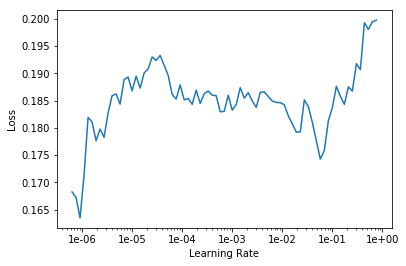

In [109]:
learn.recorder.plot()

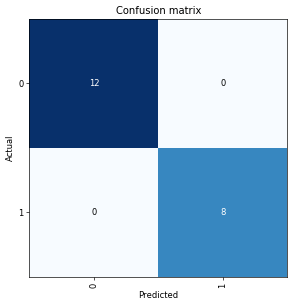

In [111]:
learninterp = ClassificationInterpretation.from_learner(learn)
learninterp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [183]:
dft = pd.read_csv('data/test.csv', '|')

In [186]:
columns_names = list(dft.columns)

In [187]:
dft.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [190]:
def normalize_columns(df, columns_names):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=columns_names)
    return df

In [192]:
dft = normalize_columns(dft, columns_names)

In [193]:
dft.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,0.6,0.254645,0.884888,0.363636,0.8,0.8,0.000481,0.001900,0.051948
1,0.4,0.548087,0.589959,0.636364,0.6,0.2,0.000878,0.000589,0.023569
2,0.0,0.087978,0.140014,0.363636,0.5,0.8,0.000188,0.000867,0.363636
3,0.8,0.290164,0.847985,0.818182,0.3,0.8,0.000859,0.001598,0.058442
4,0.8,0.485792,0.421642,0.363636,0.0,0.0,0.000693,0.000475,0.019139


In [194]:
fh = open('data/test_results.csv', 'w')
for i in range(len(dft)):
    try:
        fh.write(str(learn.predict(dft.iloc[i])[0]) + "\n")
    except IndexError:
        pass
fh.close()

KeyboardInterrupt: 

In [173]:
fh = open('data/test_results.csv', 'r')
fc = 0
nfc = 0
for line in fh:
    if line.strip() == '1':
        fc += 1
    else:
        nfc += 1
fh.close()
print(fc, nfc)

442 1437


In [148]:
308/len(dft)*100

0.06183236603154656